# wdbc.csv dataset analysis

## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset loading and description

In [3]:
# Load data from csv file
df = pd.read_csv('wdbc.csv')

In [5]:
# Display first 7 rows of data
df.head(7)

,ID number,Diagnosis,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [6]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID number  569 non-null    int64  
 1   Diagnosis  569 non-null    object 
 2   V1         569 non-null    float64
 3    V2        569 non-null    float64
 4    V3        569 non-null    float64
 5    V4        569 non-null    float64
 6    V5        569 non-null    float64
 7    V6        569 non-null    float64
 8    V7        569 non-null    float64
 9    V8        569 non-null    float64
 10   V9        569 non-null    float64
 11   V10       569 non-null    float64
 12   V11       569 non-null    float64
 13   V12       569 non-null    float64
 14   V13       569 non-null    float64
 15   V14       569 non-null    float64
 16   V15       569 non-null    float64
 17   V16       569 non-null    float64
 18   V17       569 non-null    float64
 19   V18       569 non-null    float64
 20   V19      

In [21]:
# We can observe, that we have 32 columns (30 float type, 1 int and 1 object type). There are no NAN data - each 
# row contains not-null data.

## Data cleaning

In [22]:
# First of all, we'll remove an ID number column. It's useless in our analysis (it's uniqe and not related to Diagnosis)

In [23]:
df = df.drop(columns=['ID number'])

In [24]:
# Show dataframe after removing
df.head()

,Diagnosis,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# Outliers

In [26]:
# A good method to look for outliers is boxplot - we can observe which features contain an outlier values and remove it 
# later.

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


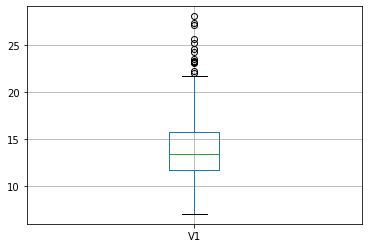

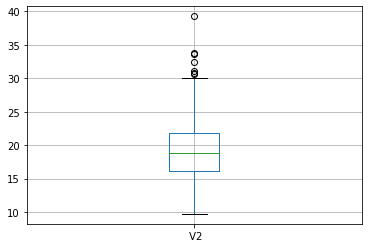

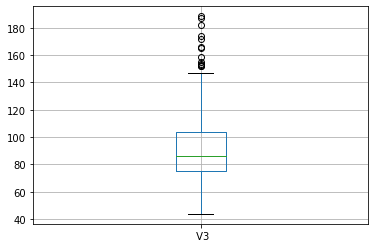

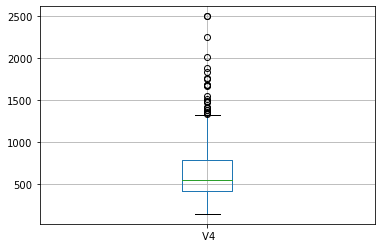

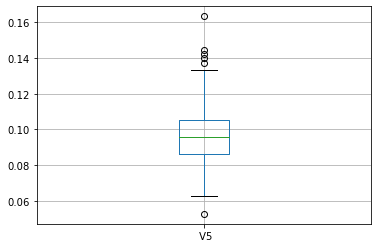

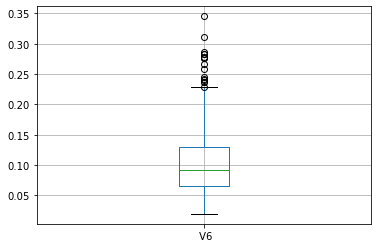

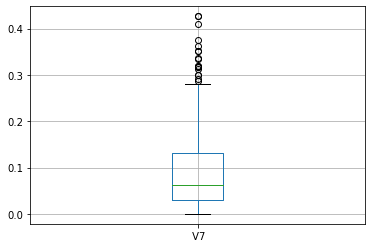

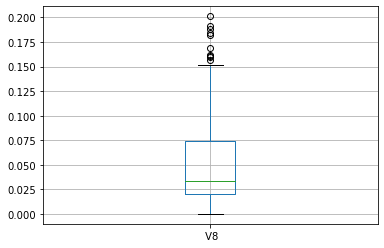

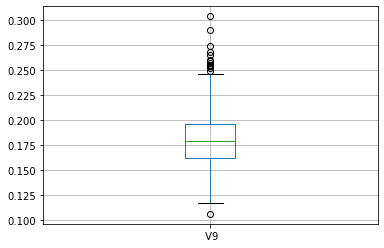

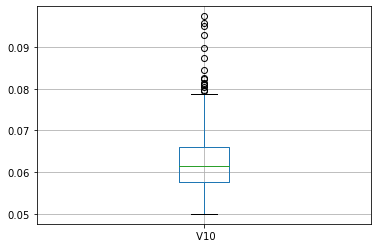

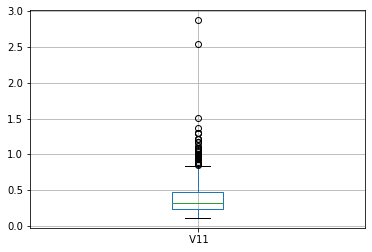

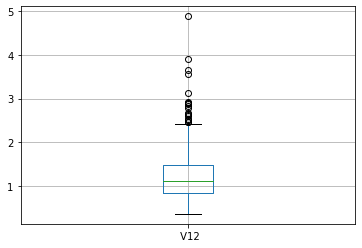

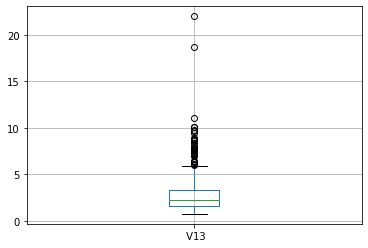

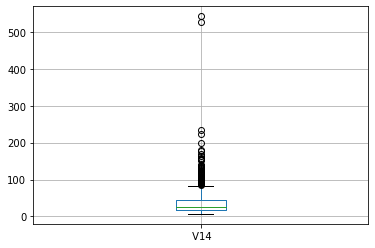

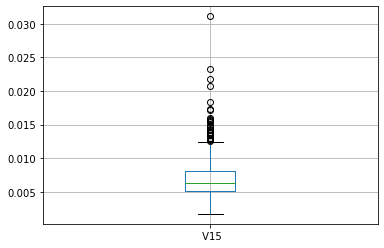

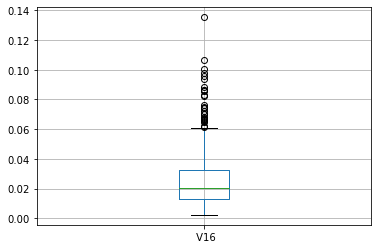

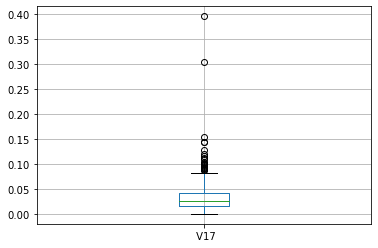

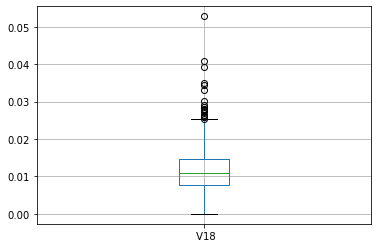

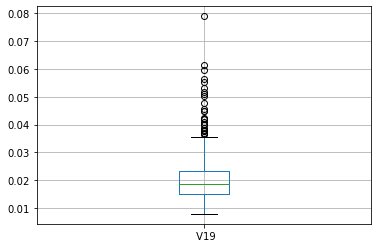

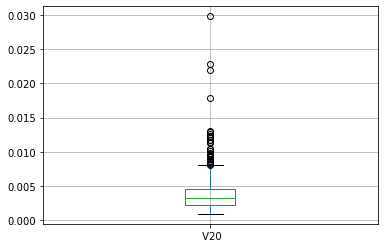

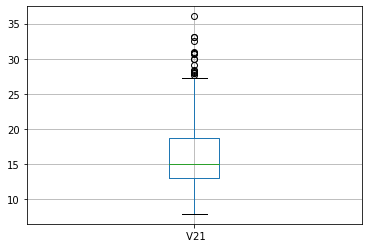

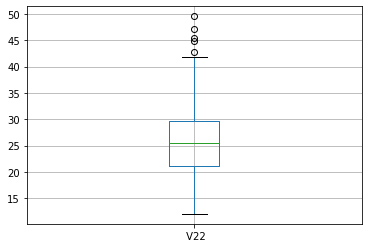

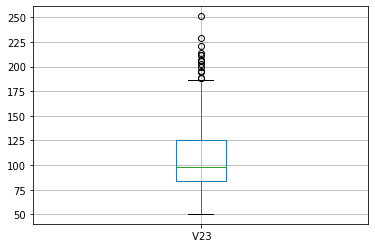

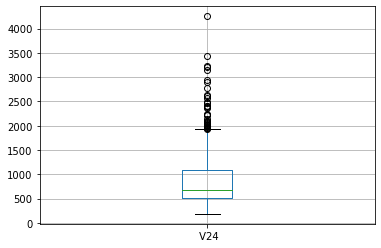

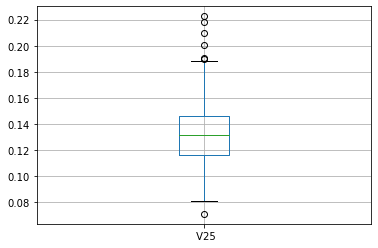

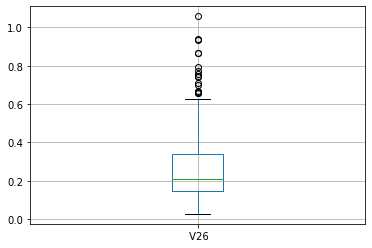

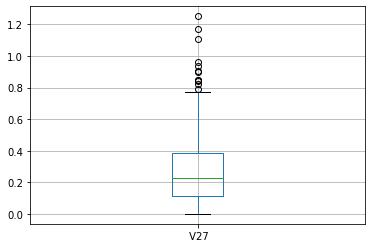

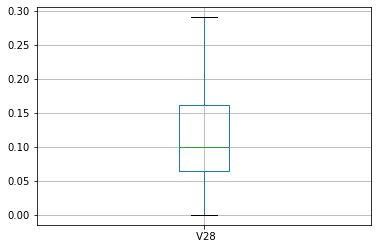

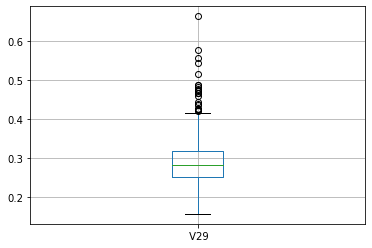

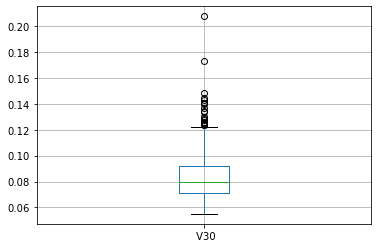

In [30]:
# Plot boxplots for each column (exclude Diagnosis - it's not a numerical column)
for col in df:
    if(col == 'Diagnosis'):
        continue
    plt.figure()
    df.boxplot([col])

In [31]:
# It's easy to observe that there are some outliers except V28. We can remove the most outlier data

In [34]:
# Let's implement a n-sigma method

In [56]:
def rm_sigma(dataFrame, column_name, sigma, verbose = False):
    # Calculate mean for data column
    mean = dataFrame[column_name].mean()
    # OCalculate std 
    std = dataFrame[column_name].std()
    # Define a thresholds
    sigma_thresh_up = mean + sigma * std
    sigma_thresh_down = mean - sigma * std
    if(verbose):
        print("Column: " + str(column_name))
        print("std: "+str(std))
        print("mean: "+str(mean))
        print("thresh up: " + str(sigma_thresh_up))
        print("thresh down: " + str(sigma_thresh_down))
    
    # Remove an outlier data
    dataFrame = dataFrame[(dataFrame[column_name] < sigma_thresh_up) & (dataFrame[column_name] > sigma_thresh_down)]
    return dataFrame[column_name]

In [106]:
# Apply soft outlier removing - rm_sigma for each column except Diagnosis and V28
# sigma = 2 (not very restric outliers removing, but we'll save a lot of data) - if it'll be not enough, we can go 
# back here after classifier building and remove more data
sigma = 2

In [107]:
df_clear = pd.DataFrame()
for column_name in df.columns:
    # If Diagnosis od V28 - just return a column
    if(column_name in ["Diagnosis", "V28"]):
        df_clear[column_name] = df[column_name]
    else:
        df_clear[column_name] = rm_sigma(df, column_name, sigma)

In [108]:
# Po usuwaniu pojawiają się brakujące dane

In [109]:
df_clear.head()

,Diagnosis,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,M,17.99,NaN,122.80,1001.0,0.11840,NaN,NaN,NaN,NaN,...,25.38,17.33,NaN,2019.0,0.1622,NaN,NaN,NaN,NaN,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,NaN,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,NaN,NaN,0.2414,0.10520,NaN,...,14.91,26.50,98.87,567.7,NaN,NaN,0.6869,NaN,NaN,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [194]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diagnosis  569 non-null    object 
 1   V1         549 non-null    float64
 2    V2        544 non-null    float64
 3    V3        547 non-null    float64
 4    V4        546 non-null    float64
 5    V5        549 non-null    float64
 6    V6        541 non-null    float64
 7    V7        543 non-null    float64
 8    V8        542 non-null    float64
 9    V9        539 non-null    float64
 10   V10       544 non-null    float64
 11   V11       540 non-null    float64
 12   V12       546 non-null    float64
 13   V13       538 non-null    float64
 14   V14       550 non-null    float64
 15   V15       546 non-null    float64
 16   V16       541 non-null    float64
 17   V17       550 non-null    float64
 18   V18       545 non-null    float64
 19   V19       544 non-null    float64
 20   V20      

In [113]:
# Remove rows where each value is nan
df_nan_rm = df_nan_rm.dropna()

In [115]:
# Show dataframe info
df_nan_rm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 1 to 560
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diagnosis  382 non-null    object 
 1   V1         382 non-null    float64
 2    V2        382 non-null    float64
 3    V3        382 non-null    float64
 4    V4        382 non-null    float64
 5    V5        382 non-null    float64
 6    V6        382 non-null    float64
 7    V7        382 non-null    float64
 8    V8        382 non-null    float64
 9    V9        382 non-null    float64
 10   V10       382 non-null    float64
 11   V11       382 non-null    float64
 12   V12       382 non-null    float64
 13   V13       382 non-null    float64
 14   V14       382 non-null    float64
 15   V15       382 non-null    float64
 16   V16       382 non-null    float64
 17   V17       382 non-null    float64
 18   V18       382 non-null    float64
 19   V19       382 non-null    float64
 20   V20      

In [116]:
# Now we have ~400 rows - 160 deleted.

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


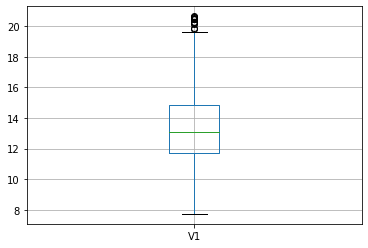

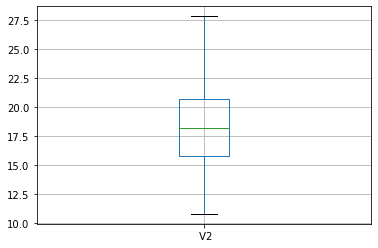

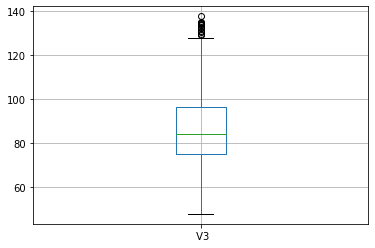

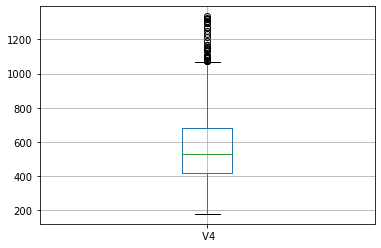

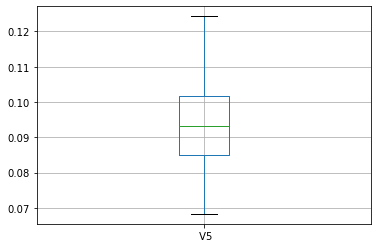

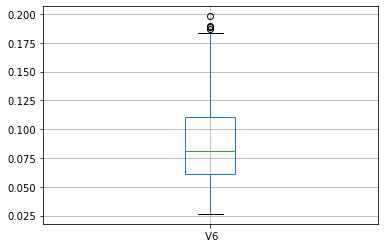

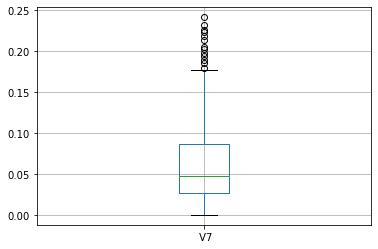

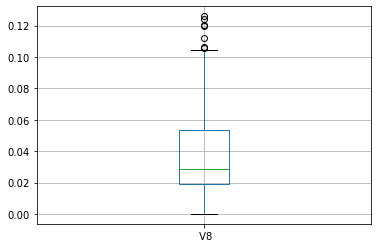

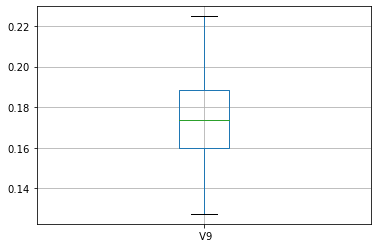

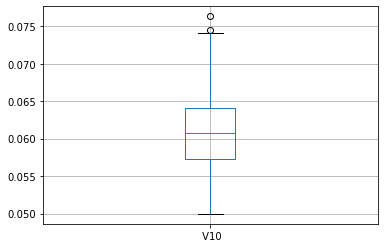

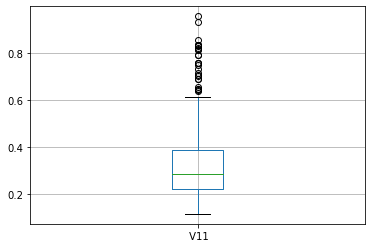

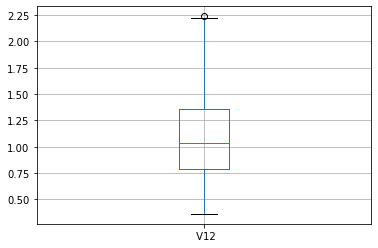

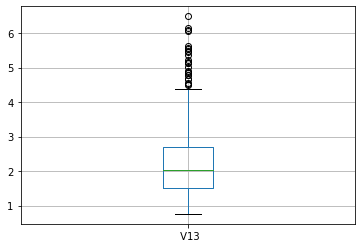

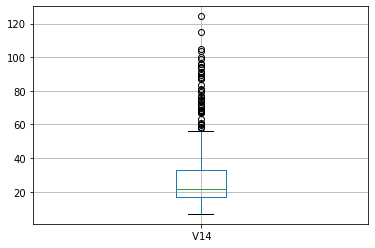

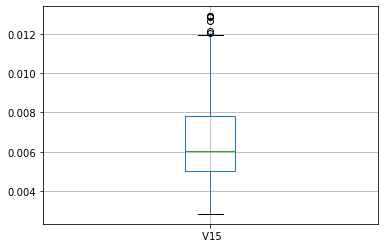

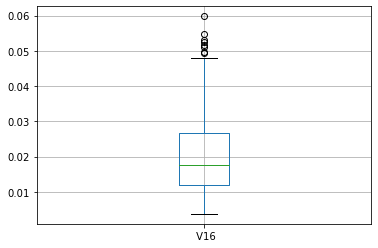

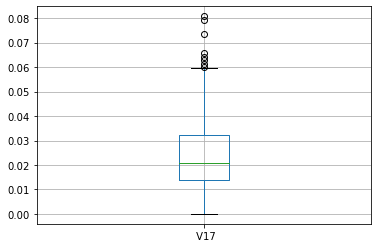

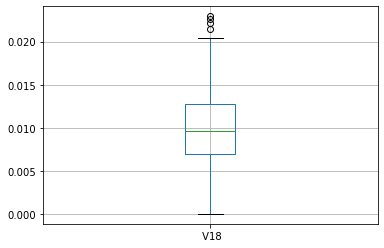

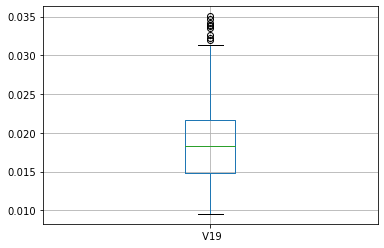

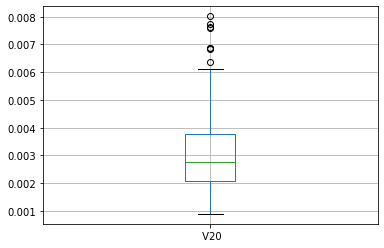

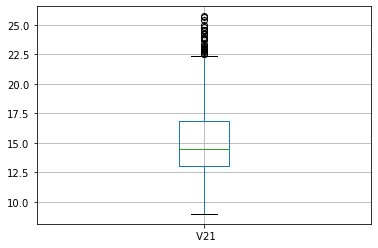

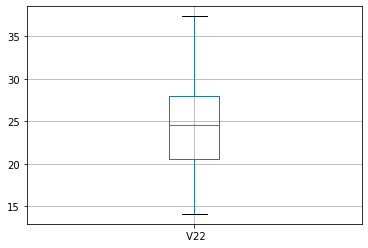

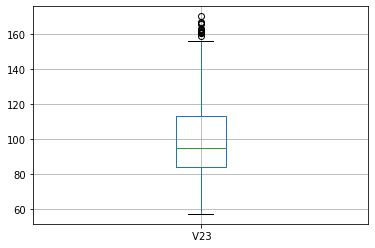

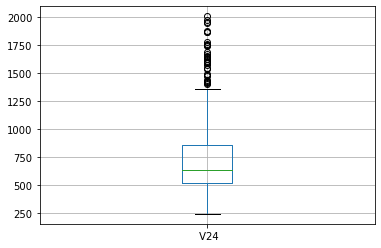

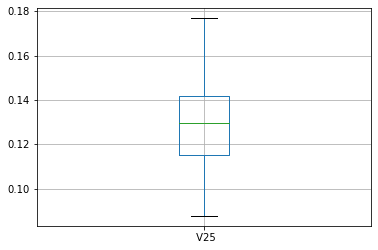

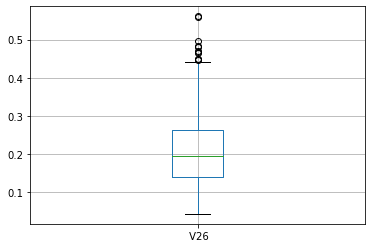

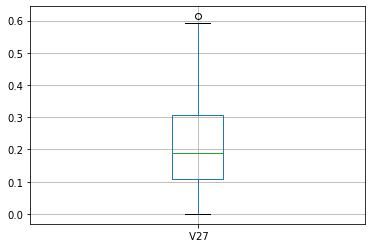

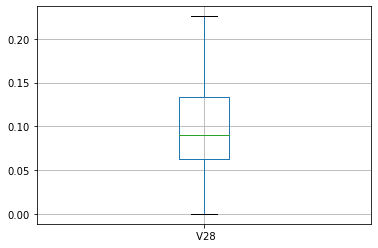

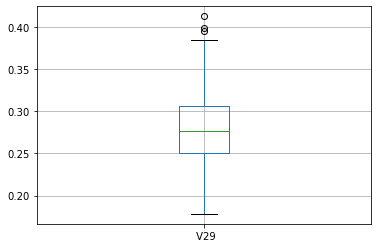

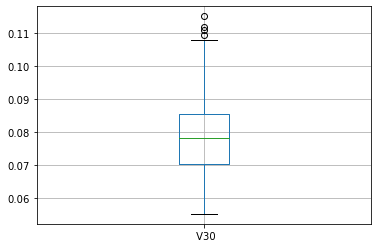

In [117]:
# Plot boxlplots
for col in df_nan_rm:
    if(col == 'Diagnosis'):
        continue
    plt.figure()
    df_nan_rm.boxplot([col])

In [118]:
# We can observe, that number of outliers has been significantly reduced. If we want to recieve more data - we can
# change a threshold in n-sigma method.

## Target variable and  predictor variables

In [124]:
# Now we have to look on our target variable. It's placed in first column - it's Diagnosis.

In [125]:
# Reset index 
df_nan_rm = df_nan_rm.reset_index(drop=True)

In [126]:
df_nan_rm.head()

,Diagnosis,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,M,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
2,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
3,M,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
4,M,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [132]:
# Let's check a class balance in Diagnosis - we have more B than M samples. 

In [133]:
df_nan_rm['Diagnosis'].value_counts()

B    280
M    102
Name: Diagnosis, dtype: int64

In [135]:
# Replace M and B with numerical 0 and 1
df_nan_rm['Diagnosis'] = df_nan_rm['Diagnosis'].apply(lambda row: 0 if row=='M' else 1)

In [136]:
df_nan_rm['Diagnosis'].value_counts()

1    280
0    102
Name: Diagnosis, dtype: int64

## Create train/test data and normalize it

In [138]:
X = df_nan_rm.drop(columns= ['Diagnosis'])

In [139]:
Y = df_nan_rm.Diagnosis

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Train - test (80%-20%)
# Random state for the same results
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=123) 

# Scaler - fit with training data, transform test data with train hyperparams
min_max_scaler = MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(x_train)
x_test_norm = min_max_scaler.transform(x_test)

In [167]:
# Let's create ROC_CURVE plot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_ROC(x_test, y_proba, y_test, model_str):
    model_probs = y_proba[:, 1]
    ns_probs = [0 for _ in range(len(model_probs))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, model_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, model_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill classifier')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_str)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

## Model training 

In [168]:
# 1. Logistic regression

In [169]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logistic = LogisticRegression()
logistic.fit(x_train_norm, y_train)

LogisticRegression()

In [170]:
# Calculate proba
logistic_proba = logistic.predict_proba(x_test_norm)

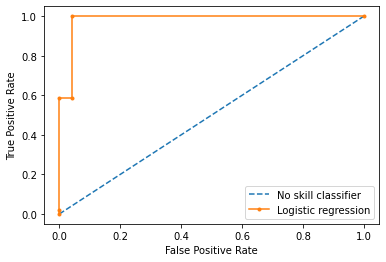

In [171]:
# Plot ROC 
plot_ROC(x_test_norm, logistic_proba, y_test, 'Logistic regression')

In [172]:
from sklearn.metrics import classification_report,confusion_matrix

In [173]:
# Confusion matrix
y_pred_logistic = logistic.predict(x_test_norm)
confusion_matrix(y_test, y_pred_logistic)

array([[23,  1],
       [ 1, 52]], dtype=int64)

In [174]:
# Classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.98      0.98      0.98        53

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



In [175]:
performance_report = classification_report(y_test, y_pred_logistic, output_dict=True)

In [176]:
performance_report

{'0': {'precision': 0.9583333333333334,
  'recall': 0.9583333333333334,
  'f1-score': 0.9583333333333334,
  'support': 24},
 '1': {'precision': 0.9811320754716981,
  'recall': 0.9811320754716981,
  'f1-score': 0.9811320754716981,
  'support': 53},
 'accuracy': 0.974025974025974,
 'macro avg': {'precision': 0.9697327044025157,
  'recall': 0.9697327044025157,
  'f1-score': 0.9697327044025157,
  'support': 77},
 'weighted avg': {'precision': 0.974025974025974,
  'recall': 0.974025974025974,
  'f1-score': 0.974025974025974,
  'support': 77}}

In [177]:
# 2. Naive Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_norm, y_train)

GaussianNB()

In [179]:
nb_proba = nb.predict_proba(x_test_norm)

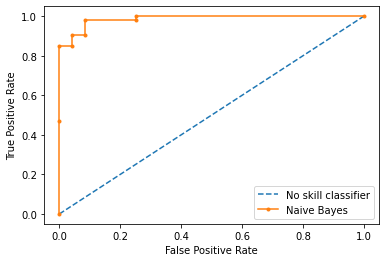

In [180]:
# ROC
plot_ROC(x_test_norm, nb_proba, y_test, 'Naive Bayes')

In [181]:
y_pred_nb = nb.predict(x_test_norm)
confusion_matrix(y_test, y_pred_nb)

array([[22,  2],
       [ 3, 50]], dtype=int64)

In [182]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.96      0.94      0.95        53

    accuracy                           0.94        77
   macro avg       0.92      0.93      0.93        77
weighted avg       0.94      0.94      0.94        77



In [183]:
performance_report = classification_report(y_test, y_pred_nb, output_dict=True)

In [184]:
performance_report

{'0': {'precision': 0.88,
  'recall': 0.9166666666666666,
  'f1-score': 0.8979591836734694,
  'support': 24},
 '1': {'precision': 0.9615384615384616,
  'recall': 0.9433962264150944,
  'f1-score': 0.9523809523809524,
  'support': 53},
 'accuracy': 0.935064935064935,
 'macro avg': {'precision': 0.9207692307692308,
  'recall': 0.9300314465408805,
  'f1-score': 0.9251700680272109,
  'support': 77},
 'weighted avg': {'precision': 0.936123876123876,
  'recall': 0.935064935064935,
  'f1-score': 0.9354183231734253,
  'support': 77}}

In [185]:
# 3. XGBoost Classifier 
from xgboost import XGBClassifier

XGBoost_model = XGBClassifier()
XGBoost_model.fit(x_train_norm, y_train)

[18:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Marcin\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [186]:
xgb_proba = XGBoost_model.predict_proba(x_test_norm)

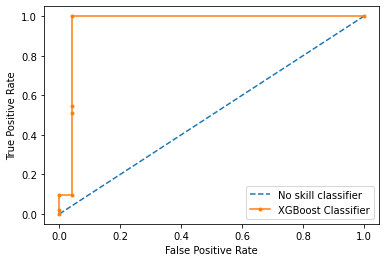

In [187]:
#  ROC
plot_ROC(x_test_norm, xgb_proba, y_test, 'XGBoost Classifier')

In [190]:
y_pred_xgb = XGBoost_model.predict(x_test_norm)
confusion_matrix(y_test, y_pred_xgb)

array([[23,  1],
       [ 0, 53]], dtype=int64)

In [191]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.98      1.00      0.99        53

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.98        77
weighted avg       0.99      0.99      0.99        77



In [192]:
performance_report = classification_report(y_test, y_pred_xgb, output_dict=True)

In [193]:
performance_report

{'0': {'precision': 1.0,
  'recall': 0.9583333333333334,
  'f1-score': 0.9787234042553191,
  'support': 24},
 '1': {'precision': 0.9814814814814815,
  'recall': 1.0,
  'f1-score': 0.9906542056074767,
  'support': 53},
 'accuracy': 0.987012987012987,
 'macro avg': {'precision': 0.9907407407407407,
  'recall': 0.9791666666666667,
  'f1-score': 0.984688804931398,
  'support': 77},
 'weighted avg': {'precision': 0.9872534872534873,
  'recall': 0.987012987012987,
  'f1-score': 0.986935514276934,
  'support': 77}}

## Results 

The analyzed data were related to patients with brest cancer. The target variable was "Diagnosis" meaning the type of cance - malignant (M) or benigin (B). A preliminary exploratory analysis was performed - data were read and outliers were removed using n-Sigma method. The data were split into train and test data and Machine Learning models were created. The first one was Logistic Regression (LR), the second one was Naive Bayes Classifier (NBS) and the last one was XGBoost Classifier (XGBC). Various metrics were calculated to evaluate the quality of the classifiers. It was accuracy, precision, recall and f1-score. Additionally - results were presented in the form of Confusion Matrix and ROC curve was shown for each classifier. Despite the fact that the data (target variable) after removing outliers was unbalanced, very good results were obtained. The best results were reached by XGBC classifier. The accuracy and precision was 0.99 and recall value was 0.98. The area under the ROC curve (AUC) was very large for each classifier. In summary - the data analysis and calssification was successful. Each classifier obtained really good results.